# Predicting Amazon Ratings Based on Review Text

# AIM

Aim of this project is use the reviews of Amazon’s inhouse brand, AmazonBasics, to perform a "Sentiment Analysis" of the reviews and to write an algorithm which will predict review ratings based on the TEXT of the reviews posted. </font>

# DATA SET
    
<font size = 4 > The data set used in the present project is available at "data.world"
`https://data.world/datafiniti/consumer-reviews-of-amazon-products`. 
    
The CSV file of the data set is downloaded to local machine. </font>

In [1]:
# Import modules 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import sklearn

In [2]:
# import dataset
df = pd.read_csv('/Users/nitinmahajan/Downloads/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

# Exploratory Data Analysis (EDA) 

In [3]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating
count,4.100000e+01,16115.000000,28332.000000
mean,1.840066e+08,0.529321,4.514048
std,2.337036e+07,9.345017,0.934957
min,1.116244e+08,0.000000,1.000000
25%,1.843344e+08,0.000000,4.000000
50%,1.885078e+08,0.000000,5.000000
75%,1.988160e+08,0.000000,5.000000
max,2.085304e+08,621.000000,5.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
id                     28332 non-null object
dateAdded              28332 non-null object
dateUpdated            28332 non-null object
name                   28332 non-null object
asins                  28332 non-null object
brand                  28332 non-null object
categories             28332 non-null object
primaryCategories      28332 non-null object
imageURLs              28332 non-null object
keys                   28332 non-null object
manufacturer           28332 non-null object
manufacturerNumber     28332 non-null object
reviews.date           28332 non-null object
reviews.dateSeen       28332 non-null object
reviews.didPurchase    9 non-null object
reviews.doRecommend    16086 non-null object
reviews.id             41 non-null float64
reviews.numHelpful     16115 non-null float64
reviews.rating         28332 non-null int64
reviews.sourceURLs     28332 non-null obje

## Inference-EDA

1. Data set have a total of 28332 rows and 24 coulmns

2. 3 numerical and 21 object variables

3. There are many coumns which dont have novel information and therefore can be dropped from the final dataframe.

4. Only four coulmns have missing or NAN values.

5. We can include the following coulmns (total 11) and drop rest of the coulmns : 'id', 'dateAdded', 'dateUpdated', 'name', 'brand', 'categories', 'primaryCategories', 'reviews.rating', 'reviews.text', 'reviews.title', 'reviews.username'

In [6]:
#Clean data frame
df_clean = df[['id', 'dateAdded', 'dateUpdated', 'name', 'brand', 
               'categories', 'primaryCategories', 'reviews.rating', 'reviews.text', 
               'reviews.title', 'reviews.username']]

In [7]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 11 columns):
id                   28332 non-null object
dateAdded            28332 non-null object
dateUpdated          28332 non-null object
name                 28332 non-null object
brand                28332 non-null object
categories           28332 non-null object
primaryCategories    28332 non-null object
reviews.rating       28332 non-null int64
reviews.text         28332 non-null object
reviews.title        28332 non-null object
reviews.username     28332 non-null object
dtypes: int64(1), object(10)
memory usage: 2.4+ MB


In [9]:
df_clean.describe()

,reviews.rating
count,28332.000000
mean,4.514048
std,0.934957
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [10]:
#convert reviews.text to string
df_clean['reviews.text'] = df_clean['reviews.text'].astype('str')

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


__To get an better idea of the total words (text), I would add new coulmns as word_counts__

In [11]:
df_clean['text_word_count'] = df_clean['reviews.text'].str.split().str.len()
df_clean['title_word_count'] = df_clean['reviews.title'].str.split().str.len()

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df_clean.head()
# the neew data frame has Total 13 columns

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,31,20
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10


In [13]:
df_clean.describe()
#Now total 3 numerical coulmns

,reviews.rating,text_word_count,title_word_count
count,28332.000000,28332.000000,28332.000000
mean,4.514048,25.945009,3.656749
std,0.934957,37.075899,2.614603
min,1.000000,1.000000,1.000000
25%,4.000000,10.000000,2.000000
50%,5.000000,17.000000,3.000000
75%,5.000000,31.000000,5.000000
max,5.000000,1539.000000,28.000000


In [14]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 13 columns):
id                   28332 non-null object
dateAdded            28332 non-null object
dateUpdated          28332 non-null object
name                 28332 non-null object
brand                28332 non-null object
categories           28332 non-null object
primaryCategories    28332 non-null object
reviews.rating       28332 non-null int64
reviews.text         28332 non-null object
reviews.title        28332 non-null object
reviews.username     28332 non-null object
text_word_count      28332 non-null int64
title_word_count     28332 non-null int64
dtypes: int64(3), object(10)
memory usage: 2.8+ MB


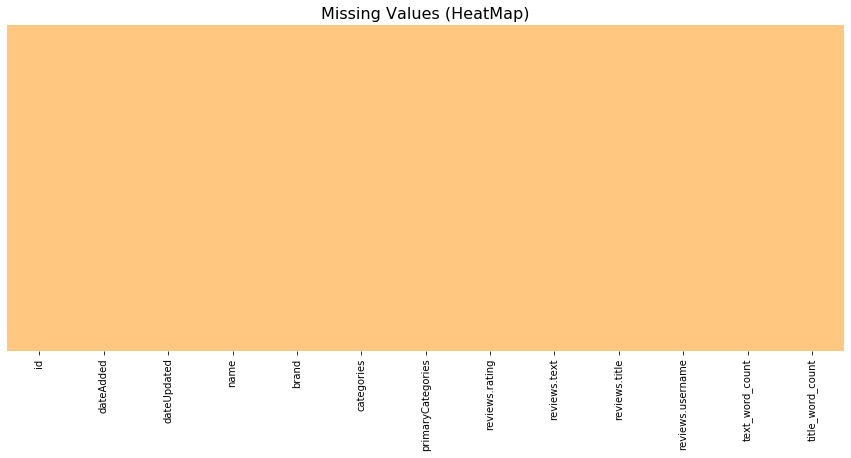

In [15]:
# Visualization of missing values as heatmap
import matplotlib.style as style #sets the size of the charts
plt.figure(figsize=(15,6))
plt.title('Missing Values (HeatMap)', fontsize = 16)
sns.heatmap(df_clean.isnull(),cbar=False,yticklabels=False,cmap = 'copper_r') #Check 'cmap'
plt.show()

__`df_clean` with 13 columns and 28332 rows is the final clean data frame we will be using for the SENTIMENT ANALYSIS__

Text(0, 0.5, 'Number of Reviews')

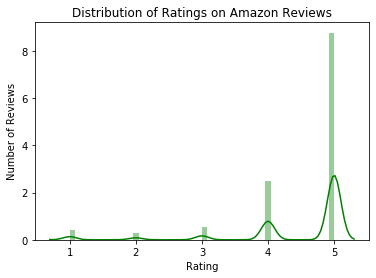

In [16]:
sns.distplot(df_clean['reviews.rating'], color='green')
plt.title('Distribution of Ratings on Amazon Reviews')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')

## Inference

- Very strong left skew. 

- `Note` - Might have an effect on final model 

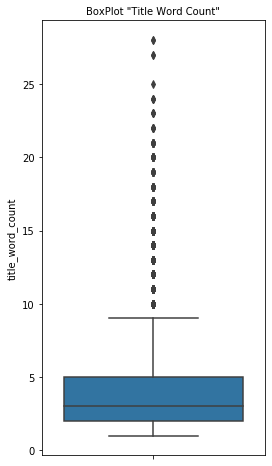

In [17]:
plt.figure(figsize=(4, 8))
plt.title('BoxPlot "Title Word Count"', fontsize = 10)
sns.boxplot(y= df_clean["title_word_count"])

## Inference

- There are few outliers, which we can trim. 

In [18]:
#Find number of reviews for each category
df_clean['categories'].value_counts()

AA,AAA,Health,Electronics,Health & Household,Camcorder Batteries,Camera & Photo,Batteries,Household Batteries,Robot Check,Accessories,Camera Batteries,Health and Beauty,Household Supplies,Batteries & Chargers,Health, Household & Baby Care,Health Personal Care                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           8343
AA,AAA,Electronics Features,Health,Electronics,Health

In [19]:
df_clean['name'].value_counts()

AmazonBasics AAA Performance Alkaline Batteries (36 Count)                               8343
AmazonBasics AA Performance Alkaline Batteries (48 Count) - Packaging May Vary           3728
Fire HD 8 Tablet with Alexa, 8 HD Display, 16 GB, Tangerine - with Special Offers        2443
All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Black    2370
Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Pink Kid-Proof Case                   1676
                                                                                         ... 
AmazonBasics Nespresso Pod Storage Drawer - 50 Capsule Capacity                             1
Two Door Top Load Pet Kennel Travel Crate Dog Cat Pet Cage Carrier Box Tray 23"             1
AmazonBasics Silicone Hot Handle Cover/Holder - Red                                         1
Amazon Echo Show - Black                                                                    1
AmazonBasics Single-Door Folding Metal Dog Crate - Large (42

In [20]:
df_clean['primaryCategories'].value_counts()

Electronics                    13995
Health & Beauty                12071
Toys & Games,Electronics        1676
Office Supplies,Electronics      386
Electronics,Media                185
Office Supplies                    9
Animals & Pet Supplies             6
Electronics,Furniture              2
Home & Garden                      2
Name: primaryCategories, dtype: int64

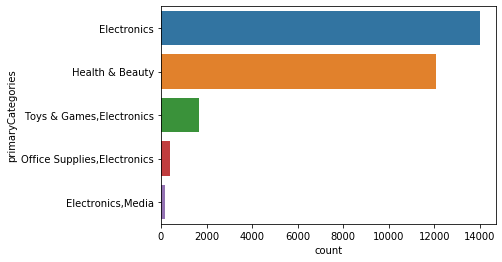

In [21]:
sns.countplot(y = df_clean['primaryCategories'], order = df_clean['primaryCategories'].value_counts().iloc[:5].index)
plt.show()

## Inference

- Majority of the reviews are for Electronics and Health & Beauty

### Clean and Pre-Process for NLP

- __coverting to lower case__

- __removing all the the stop words__

- __removing periods and commas__

In [22]:
#Start by converting the text to all lowercase letters

df_clean['reviews.text'] = df_clean['reviews.text'].str.lower()

#Now get rid of any numbers

df_clean['reviews.text'] = df_clean['reviews.text'].str.replace('\d+', '')

#Get rid of periods and commas

df_clean['reviews.text'] = df_clean['reviews.text'].str.replace('.', '')
df_clean['reviews.text'] = df_clean['reviews.text'].str.replace(',', '')

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

### Tokenization:

- is a way to split text into tokens. These token could be paragraphs, sentences, or individual words.

The NLTK provides a number of tokenizers and the text is first tokenized into sentences using the PunktSentenceTokenizer.

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nitinmahajan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Tokenize Sentences

A paragraph can be split into sentencs using the method sent_tokenize()

In [24]:
from nltk.tokenize import sent_tokenize

df_clean['tokenized_sentence_text'] = df_clean['reviews.text'].apply(sent_tokenize)

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
print(df_clean['tokenized_sentence_text'])

0        [i order  of them and one of the item is bad q...
1        [bulk is always the less expensive way to go f...
2        [well they are not duracell but for the price ...
3        [seem to work as well as name brand batteries ...
4        [these batteries are very long lasting the pri...
                               ...                        
28327    [i got  of these for my  yr old twins my  yr o...
28328    [i bought this for my niece for a christmas gi...
28329    [very nice for light internet browsing keeping...
28330    [this tablet does absolutely everything i want...
28331    [at ninety dollars the expectionations are low...
Name: tokenized_sentence_text, Length: 28332, dtype: object


### Tokenize words 

A sentence or data can be split into words using the method word_tokenize()

In [26]:
from nltk.tokenize import word_tokenize

df_clean['tokenized_word_text'] = df_clean['reviews.text'].apply(word_tokenize)

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
print(df_clean['tokenized_word_text'])

0        [i, order, of, them, and, one, of, the, item, ...
1        [bulk, is, always, the, less, expensive, way, ...
2        [well, they, are, not, duracell, but, for, the...
3        [seem, to, work, as, well, as, name, brand, ba...
4        [these, batteries, are, very, long, lasting, t...
                               ...                        
28327    [i, got, of, these, for, my, yr, old, twins, m...
28328    [i, bought, this, for, my, niece, for, a, chri...
28329    [very, nice, for, light, internet, browsing, k...
28330    [this, tablet, does, absolutely, everything, i...
28331    [at, ninety, dollars, the, expectionations, ar...
Name: tokenized_word_text, Length: 28332, dtype: object


In [28]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,31,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t..."


### Remove Stop Words 

In [29]:
#Remove Stop words

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nitinmahajan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [30]:
from nltk.corpus import stopwords
#set stop words
stop_words = set(stopwords.words('english'))

In [31]:
df_clean['nostop'] = df_clean['tokenized_word_text']

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
df_clean['nostop']

0        [i, order, of, them, and, one, of, the, item, ...
1        [bulk, is, always, the, less, expensive, way, ...
2        [well, they, are, not, duracell, but, for, the...
3        [seem, to, work, as, well, as, name, brand, ba...
4        [these, batteries, are, very, long, lasting, t...
                               ...                        
28327    [i, got, of, these, for, my, yr, old, twins, m...
28328    [i, bought, this, for, my, niece, for, a, chri...
28329    [very, nice, for, light, internet, browsing, k...
28330    [this, tablet, does, absolutely, everything, i...
28331    [at, ninety, dollars, the, expectionations, ar...
Name: nostop, Length: 28332, dtype: object

In [33]:
df_clean['nostop'] = df_clean['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
df_clean['tokenized_word_no_stop'] = df_clean['nostop'].apply(word_tokenize)

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_clean['tokenized_word_no_stop']

0        [order, one, item, bad, quality, missing, back...
1        [bulk, always, less, expensive, way, go, produ...
2                           [well, duracell, price, happy]
3        [seem, work, well, name, brand, batteries, muc...
4                 [batteries, long, lasting, price, great]
                               ...                        
28327    [got, yr, old, twins, yr, old, one, one, bette...
28328    [bought, niece, christmas, giftshe, years, old...
28329    [nice, light, internet, browsing, keeping, top...
28330    [tablet, absolutely, everything, want, !, watc...
28331    [ninety, dollars, expectionations, low, still,...
Name: tokenized_word_no_stop, Length: 28332, dtype: object

In [36]:
#lets check the head of the data frame
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text,nostop,tokenized_word_no_stop
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,31,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ...",order one item bad quality missing backup spri...,"[order, one, item, bad, quality, missing, back..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,13,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ...",bulk always less expensive way go products like,"[bulk, always, less, expensive, way, go, produ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,12,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the...",well duracell price happy,"[well, duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,14,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba...",seem work well name brand batteries much bette...,"[seem, work, well, name, brand, batteries, muc..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,10,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t...",batteries long lasting price great,"[batteries, long, lasting, price, great]"


In [37]:
df_clean['text_word_count'] = df_clean['nostop'].str.split().str.len()

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_clean.head()

,id,dateAdded,dateUpdated,name,brand,categories,primaryCategories,reviews.rating,reviews.text,reviews.title,reviews.username,text_word_count,title_word_count,tokenized_sentence_text,tokenized_word_text,nostop,tokenized_word_no_stop
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,3,i order of them and one of the item is bad qu...,... 3 of them and one of the item is bad quali...,Byger yang,14,20,[i order of them and one of the item is bad q...,"[i, order, of, them, and, one, of, the, item, ...",order one item bad quality missing backup spri...,"[order, one, item, bad, quality, missing, back..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,4,bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,8,11,[bulk is always the less expensive way to go f...,"[bulk, is, always, the, less, expensive, way, ...",bulk always less expensive way go products like,"[bulk, always, less, expensive, way, go, produ..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,well they are not duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,4,11,[well they are not duracell but for the price ...,"[well, they, are, not, duracell, but, for, the...",well duracell price happy,"[well, duracell, price, happy]"
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,9,11,[seem to work as well as name brand batteries ...,"[seem, to, work, as, well, as, name, brand, ba...",seem work well name brand batteries much bette...,"[seem, work, well, name, brand, batteries, muc..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,5,these batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,5,10,[these batteries are very long lasting the pri...,"[these, batteries, are, very, long, lasting, t...",batteries long lasting price great,"[batteries, long, lasting, price, great]"


In [39]:
df_clean['text_word_count'].value_counts()

6      2337
7      2336
8      1953
5      1885
2      1823
       ... 
444       1
107       1
242       1
120       1
123       1
Name: text_word_count, Length: 161, dtype: int64

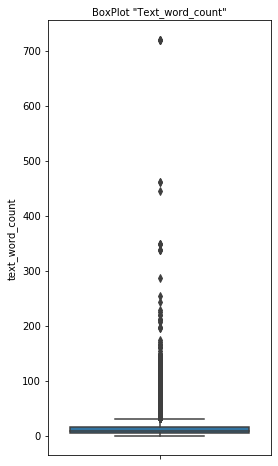

In [40]:
plt.figure(figsize=(4, 8))
plt.title('BoxPlot "Text_word_count"', fontsize = 10)
sns.boxplot(y=df_clean["text_word_count"])

### Inference 

- We can definitely remove some outliers with confidence to get the a better distribution of the data as far as the textword count is concerned.

In [41]:
#Get rid of outliers in the text word count column

twc_no_outliers = df_clean["text_word_count"][df_clean["text_word_count"].between(df_clean["text_word_count"].quantile(.15), 
                                                                         df_clean["text_word_count"].quantile(.95))]

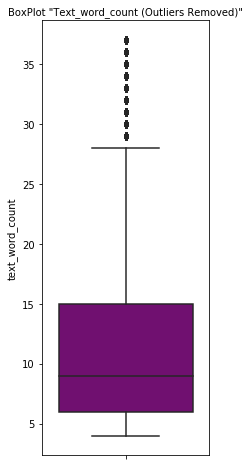

In [42]:
plt.figure(figsize=(3, 8))
plt.title('BoxPlot "Text_word_count (Outliers Removed)"', fontsize = 10)
sns.boxplot(y=twc_no_outliers, palette=['purple'])

### Distributions of word counts based on rating 

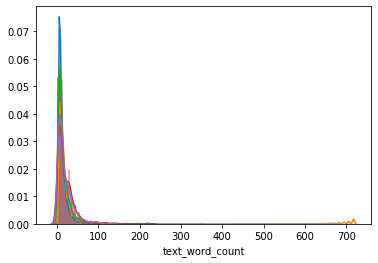

In [43]:
#seperate by rating
five = df_clean[df_clean['reviews.rating'] == 5]
four = df_clean[df_clean['reviews.rating'] == 4]
three = df_clean[df_clean['reviews.rating'] == 3]
two = df_clean[df_clean['reviews.rating'] == 2]
one = df_clean[df_clean['reviews.rating'] == 1]

#plot distributions
sns.distplot(five['text_word_count'])
sns.distplot(four['text_word_count'])
sns.distplot(three['text_word_count'])
sns.distplot(two['text_word_count'])
sns.distplot(one['text_word_count'])
plt.show()

__Inference__

- The distribution is more towards the left hand side. We nned to remove some outliers here as well. 

In [44]:
#Remove outliers (to kill two birds with one bow)
five_no_out = five["text_word_count"][five["text_word_count"].between(five["text_word_count"].quantile(.15), 
                                                                         five["text_word_count"].quantile(.95))]
four_no_out = four["text_word_count"][four["text_word_count"].between(four["text_word_count"].quantile(.15), 
                                                                         four["text_word_count"].quantile(.95))]
three_no_out = three["text_word_count"][three["text_word_count"].between(three["text_word_count"].quantile(.15), 
                                                                         three["text_word_count"].quantile(.95))]
two_no_out = two["text_word_count"][two["text_word_count"].between(two["text_word_count"].quantile(.15), 
                                                                         two["text_word_count"].quantile(.95))]
one_no_out = one["text_word_count"][one["text_word_count"].between(one["text_word_count"].quantile(.15), 
                                                                         one["text_word_count"].quantile(.95))]

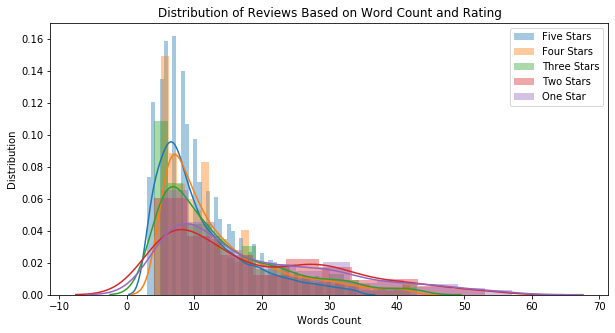

In [45]:
#plot distributions
plt.figure(figsize=(10, 5))
sns.distplot(five_no_out)
sns.distplot(four_no_out)
sns.distplot(three_no_out)
sns.distplot(two_no_out)
sns.distplot(one_no_out)
plt.legend(labels = ['Five Stars', 'Four Stars', 'Three Stars', 'Two Stars', 'One Star'], loc= 'best')
plt.ylabel('Distribution')
plt.xlabel('Words Count')
plt.title('Distribution of Reviews Based on Word Count and Rating')
plt.show()

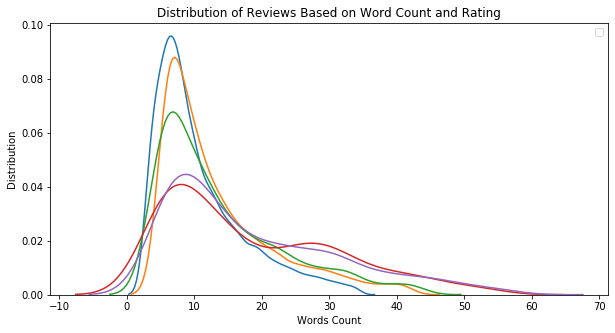

In [46]:
####plot distributions with out the histograms ###
plt.figure(figsize=(10, 5))
sns.distplot(five_no_out, hist=False)
sns.distplot(four_no_out, hist=False)
sns.distplot(three_no_out, hist=False)
sns.distplot(two_no_out, hist=False)
sns.distplot(one_no_out, hist=False)
plt.legend(labels = ['Five Stars', 'Four Stars', 'Three Stars', 'Two Stars', 'One Star'], loc= 'best')
plt.ylabel('Distribution')
plt.xlabel('Words Count')
plt.title('Distribution of Reviews Based on Word Count and Rating')
plt.show()

__Inference__

- All 5 distributions follow the same trend, with a peak at around 10 words per review.

- There seems no correlation with word count and rating

# Machine Learning

In [47]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(df_clean["nostop"], df_clean['reviews.rating'],
                                                    test_size=0.20, random_state = 42)



### CountVectorizer

- By using CountVectorizer function we can convert text document to matrix of word count.

- The CountVectorizer transformer from the sklearn.feature_extraction model has its own internal tokenization and normalization methods. 

In [49]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english")

In [50]:
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)

# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)

# Print the first 20 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:20])

['_without_', 'aa', 'aaa', 'aaai', 'aaas', 'aas', 'aawith', 'abandon', 'abc', 'abcmousecom', 'abcs', 'abg', 'abi', 'abilities', 'ability', 'abit', 'abj', 'abke', 'able', 'abnormal']


### TfidfVectorizer 

- TF-IDF stands for Term Frequency-Inverse Document Frequency which basically tells importance of the word in the corpus or dataset. TF-IDF contain two concept Term Frequency(TF) and Inverse Document Frequency(IDF)

- Scikit-Learn provides a transformer called the TfidfVectorizer in the module called feature_extraction.text for vectorizing documents with TF–IDF scores.

- `TfidfVectorizer` uses the `CountVectorizer` estimator we used to produce the bag-of-words encoding to count occurrences of tokens, followed by a TfidfTransformer, which normalizes these occurrence counts by the inverse document frequency.

In [51]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english", max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 5 features
print(tfidf_vectorizer.get_feature_names()[:5])

# Print the first 3 vectors of the tfidf training data
print(tfidf_train.A[:3])

['_without_', 'aa', 'aaa', 'aaai', 'aaas']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [52]:
# Create the CountVectorizer DataFrame: count_df
count_df = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())

# Print the head of count_df
print(count_df.head())

# Print the head of tfidf_df
print(tfidf_df.head())

# Calculate the difference in columns: difference
difference = set(count_df.columns) - set(tfidf_df.columns)
print(difference)

   _without_  aa  aaa  aaai  aaas  aas  aawith  abandon  abc  abcmousecom  \
0          0   0    0     0     0    0       0        0    0            0   
1          0   0    0     0     0    0       0        0    0            0   
2          0   0    0     0     0    0       0        0    0            0   
3          0   0    0     0     0    0       0        0    0            0   
4          0   0    0     0     0    0       0        0    0            0   

   ...  äôs  äôsadvertisement  äôt  äôve  äù  äùtablet  äúdual  äúparent  \
0  ...    0                 0    0     0   0         0       0         0   
1  ...    0                 0    0     0   0         0       0         0   
2  ...    0                 0    0     0   0         0       0         0   
3  ...    0                 0    0     0   0         0       0         0   
4  ...    0                 0    0     0   0         0       0         0   

   äúyou  ôºå  
0      0    0  
1      0    0  
2      0    0  
3      0    0  


In [53]:
from sklearn.metrics import classification_report

## Models Created:

Naive Bayes model

Logistic regression model 

Decision tree model 

### Naive Bayes Classifier 

In [54]:
# Import the necessary modules
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train, y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

In [55]:
print('train set accuracy', nb_classifier.fit(count_train, y_train).score(count_train, y_train))
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print('test set accuracy:', score)
#naive bayes classification report
print(classification_report(y_test, pred))

train set accuracy 0.7872049415398191
test set accuracy: 0.7548967707781895
              precision    recall  f1-score   support

           1       0.63      0.56      0.59       185
           2       0.86      0.09      0.16       140
           3       0.59      0.07      0.12       254
           4       0.54      0.32      0.40      1093
           5       0.79      0.95      0.86      3995

    accuracy                           0.75      5667
   macro avg       0.68      0.40      0.43      5667
weighted avg       0.73      0.75      0.71      5667



### Logistic Regression 

In [56]:
# Start with logistic regression
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression classifier: nb_classifier
lr_classifier = LogisticRegression()

# Fit the classifier to the training data
lr_classifier.fit(count_train, y_train).score(count_train, y_train)

# Create the predicted tags: pred
predlr = lr_classifier.predict(count_test)

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [57]:
print('train set accuracy', lr_classifier.fit(count_train, y_train).score(count_train, y_train))
score = metrics.accuracy_score(y_test, predlr)
print('test set accuracy:', score)

#Logistic Regression Classification report
print(classification_report(y_test, predlr))

train set accuracy 0.8400617692477388
test set accuracy: 0.7748367743073937
              precision    recall  f1-score   support

           1       0.75      0.56      0.64       185
           2       0.67      0.26      0.38       140
           3       0.59      0.19      0.29       254
           4       0.63      0.33      0.44      1093
           5       0.80      0.96      0.87      3995

    accuracy                           0.77      5667
   macro avg       0.69      0.46      0.52      5667
weighted avg       0.75      0.77      0.74      5667



### Decision Tree Classifier 

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [59]:
dtclassifier = DecisionTreeClassifier()

In [60]:
# Fit the classifier to the training data
print('train set accuracy', dtclassifier.fit(count_train, y_train).score(count_train, y_train))

train set accuracy 0.9834105448930068


In [61]:
# Create the predicted tags: pred
preddt = dtclassifier.predict(count_test)

In [62]:
# Fit the classifier to the training data
print('train set accuracy', dtclassifier.fit(count_train, y_train).score(count_train, y_train))
# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddt)
print('test set accuracy', score)
#Decision Tree Classification report
print(classification_report(y_test, preddt))

train set accuracy 0.9834105448930068
test set accuracy 0.8046585494970884
              precision    recall  f1-score   support

           1       0.56      0.64      0.60       185
           2       0.55      0.37      0.44       140
           3       0.55      0.55      0.55       254
           4       0.66      0.63      0.65      1093
           5       0.88      0.89      0.88      3995

    accuracy                           0.80      5667
   macro avg       0.64      0.62      0.62      5667
weighted avg       0.80      0.80      0.80      5667



__Inference__

- NB model predicted 5 star ratings, but the accuracy drops significantly for other ratings

- The logistic regression model has better accuracy compared to the NB model.

- The decision tree model had the best accuracy compared to other two models tested

- I will focus on optimizing the decision tree model 

___

# MODEL OPTIMIZATION

## GridSearch Cross Validation

- Grid search is the process of performing hyper parameter tuning in order to determine the optimal values for a given model. 

In [67]:
#Now to do feature implementation
from sklearn.model_selection import GridSearchCV

In [68]:
param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [100, 200, 500, 1000, 10000, 100000],
    'min_samples_split': [10, 20, 50, 100, 1000, 10000],
}

grid_search = GridSearchCV(estimator = dtclassifier, param_grid = param_grid)

In [69]:
grid_search.fit(count_train, y_train)
grid_search.best_params_

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 1000, 'min_samples_split': 10}

In [70]:
param_grid = {
    'max_depth': [500, 800, 1000, 1200, 1500], 
    'min_smples_split': [5, 6, 7, 8, 9, 10],
}

In [71]:
grid_search.fit(count_train, y_train)
grid_search.best_params_

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'criterion': 'gini', 'max_depth': 500, 'min_samples_split': 10}

In [72]:
param_grid = {
    'max_depth': [2000, 5000, 8000, 10000], 
    'min_samples_split': [2, 3, 4, 5],
}

grid_search = GridSearchCV(estimator = dtclassifier, param_grid = param_grid)

In [73]:
grid_search.fit(count_train, y_train)
grid_search.best_params_

/Users/nitinmahajan/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 8000, 'min_samples_split': 2}

### DecisionTreeClassifier

In [74]:
dtclassifieroptimized = DecisionTreeClassifier(max_depth = 5000, min_samples_split = 2)

In [75]:
# Fit the classifier to the training data
dtclassifieroptimized.fit(count_train, y_train).score(count_train, y_train)

0.9834105448930068

In [76]:
# Create the predicted tags: pred
preddtoptimized = dtclassifieroptimized.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddtoptimized)
print(score)

0.8035997882477501


In [77]:
print(classification_report(y_test, preddtoptimized))

              precision    recall  f1-score   support

           1       0.56      0.61      0.58       185
           2       0.55      0.38      0.45       140
           3       0.52      0.54      0.53       254
           4       0.67      0.64      0.65      1093
           5       0.88      0.89      0.88      3995

    accuracy                           0.80      5667
   macro avg       0.63      0.61      0.62      5667
weighted avg       0.80      0.80      0.80      5667



---

In [78]:
#do a ridge classifier

from sklearn.linear_model import RidgeClassifier

ridgeclassifier = RidgeClassifier()

# Fit the classifier to the training data
ridgeclassifier.fit(count_train, y_train).score(count_train, y_train)

0.8318111625854843

In [79]:
# Create the predicted tags: pred
predrc = ridgeclassifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, predrc)
print(score)

0.7672489853538027


In [80]:
print(classification_report(y_test, predrc))

              precision    recall  f1-score   support

           1       0.72      0.48      0.58       185
           2       0.72      0.22      0.34       140
           3       0.74      0.20      0.31       254
           4       0.63      0.31      0.41      1093
           5       0.78      0.96      0.86      3995

    accuracy                           0.77      5667
   macro avg       0.72      0.43      0.50      5667
weighted avg       0.75      0.77      0.73      5667



In [81]:
#Try to reoptimize the decision tree to stop overfitting

dtclassifierreoptimized = DecisionTreeClassifier(max_depth = 100, min_samples_split = 2)

In [82]:
# Fit the classifier to the training data
dtclassifierreoptimized.fit(count_train, y_train).score(count_train, y_train)

0.9381866313699537

In [83]:
# Create the predicted tags: pred
preddtreoptimized = dtclassifierreoptimized.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddtreoptimized)
print(score)

0.7891300511734604


In [84]:
print(classification_report(y_test, preddtreoptimized))

              precision    recall  f1-score   support

           1       0.60      0.54      0.57       185
           2       0.58      0.35      0.44       140
           3       0.56      0.45      0.50       254
           4       0.66      0.48      0.56      1093
           5       0.83      0.92      0.88      3995

    accuracy                           0.79      5667
   macro avg       0.65      0.55      0.59      5667
weighted avg       0.77      0.79      0.78      5667



In [85]:
#Try to reoptimize the decision tree to stop overfitting

dtclassifierreoptimized = DecisionTreeClassifier(max_depth = 50, min_samples_split = 2)

In [86]:
# Fit the classifier to the training data
dtclassifierreoptimized.fit(count_train, y_train).score(count_train, y_train)

0.8830796382086918

In [87]:
# Create the predicted tags: pred
preddtreoptimized = dtclassifierreoptimized.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddtreoptimized)
print(score)

0.7691900476442562


In [88]:
print(classification_report(y_test, preddtreoptimized))

              precision    recall  f1-score   support

           1       0.60      0.48      0.53       185
           2       0.66      0.29      0.40       140
           3       0.51      0.33      0.40       254
           4       0.66      0.34      0.45      1093
           5       0.80      0.94      0.86      3995

    accuracy                           0.77      5667
   macro avg       0.65      0.48      0.53      5667
weighted avg       0.75      0.77      0.74      5667



In [89]:
dtclassifierreoptimized = DecisionTreeClassifier(max_depth = 500, min_samples_split = 2)

In [90]:
# Fit the classifier to the training data
dtclassifierreoptimized.fit(count_train, y_train).score(count_train, y_train)

0.9834105448930068

In [91]:
# Create the predicted tags: pred
preddtreoptimized = dtclassifierreoptimized.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddtreoptimized)
print(score)
print(classification_report(y_test, preddtreoptimized))

0.807128992412211
              precision    recall  f1-score   support

           1       0.59      0.64      0.61       185
           2       0.60      0.38      0.46       140
           3       0.54      0.53      0.54       254
           4       0.67      0.63      0.65      1093
           5       0.87      0.90      0.88      3995

    accuracy                           0.81      5667
   macro avg       0.65      0.62      0.63      5667
weighted avg       0.80      0.81      0.80      5667



In [92]:
dtclassifierreoptimized = DecisionTreeClassifier(max_depth = 20, min_samples_split = 2)

In [93]:
# Fit the classifier to the training data
dtclassifierreoptimized.fit(count_train, y_train).score(count_train, y_train)

0.7805868078535186

In [94]:
# Create the predicted tags: pred
preddtreoptimized = dtclassifierreoptimized.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, preddtreoptimized)
print(score)
print(classification_report(y_test, preddtreoptimized))

0.7367213693312158
              precision    recall  f1-score   support

           1       0.53      0.34      0.41       185
           2       0.60      0.13      0.21       140
           3       0.52      0.19      0.28       254
           4       0.64      0.14      0.23      1093
           5       0.75      0.97      0.85      3995

    accuracy                           0.74      5667
   macro avg       0.61      0.35      0.40      5667
weighted avg       0.71      0.74      0.67      5667



#### Regardless of the model, the accuracy for the 5 star ratings are much higher than the other ratings, especially 1, 2, and 3 star ratings. To address this problem, we can  try oversampling.

### SMOTE (Synthetic Minority Oversampling Technique) – Oversampling 

- SMOTE oversamples the minority class, it does not rely on reusing previously existing observations. 

- SMOTE creates new (synthetic) observations based on the observations in the data

In [95]:
from imblearn import under_sampling 
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

Using TensorFlow backend.


In [96]:
sm = SMOTE(sampling_strategy='minority')
x_train_res, y_train_res = sm.fit_sample(count_train, y_train)

In [97]:
from collections import Counter
print('Resampled dataset shape' , Counter(y_train_res))

Resampled dataset shape Counter({5: 15902, 2: 15902, 4: 4555, 3: 952, 1: 780})


In [98]:
print('Resampled dataset shape' , Counter(y_train))

Resampled dataset shape Counter({5: 15902, 4: 4555, 3: 952, 1: 780, 2: 476})


In [99]:
#clf_rf = DecisionTreeClassifier(max_depth = 65)
clf_rf = RidgeClassifier()
clf_rf.fit(x_train_res, y_train_res).score(x_train_res, y_train_res)

0.8450290094773043

In [100]:
oversamplpred = clf_rf.predict(count_test)

In [101]:
#classification report for ridge classifier with smote on just the minority
score = metrics.accuracy_score(y_test, oversamplpred)
print(score)
print(classification_report(y_test, oversamplpred))

0.6590788777130757
              precision    recall  f1-score   support

           1       0.80      0.40      0.53       185
           2       0.08      0.70      0.15       140
           3       0.85      0.19      0.30       254
           4       0.69      0.30      0.42      1093
           5       0.83      0.80      0.81      3995

    accuracy                           0.66      5667
   macro avg       0.65      0.48      0.44      5667
weighted avg       0.78      0.66      0.69      5667



In [102]:
#Now check if we smote on 'not majority'
sm = SMOTE(sampling_strategy='not majority')
x_train_res, y_train_res = sm.fit_sample(count_train, y_train)

In [103]:
from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train_res))

Resampled dataset shape Counter({5: 15902, 4: 15902, 1: 15902, 3: 15902, 2: 15902})


In [104]:
print('sampled dataset shape %s' % Counter(y_train))

sampled dataset shape Counter({5: 15902, 4: 4555, 3: 952, 1: 780, 2: 476})


In [105]:
clf_rf = RidgeClassifier()
clf_rf.fit(x_train_res, y_train_res).score(x_train_res, y_train_res)

0.6337190290529493

In [106]:
#Classification report on ridge classifier smoted on 'not majority'
oversamplpred = clf_rf.predict(count_test)
score = metrics.accuracy_score(y_test, oversamplpred)
print(score)
print(classification_report(y_test, oversamplpred))

0.6266101994000353
              precision    recall  f1-score   support

           1       0.28      0.63      0.39       185
           2       0.19      0.44      0.26       140
           3       0.21      0.35      0.26       254
           4       0.42      0.50      0.45      1093
           5       0.86      0.69      0.76      3995

    accuracy                           0.63      5667
   macro avg       0.39      0.52      0.42      5667
weighted avg       0.71      0.63      0.66      5667



In [107]:
sm = SMOTE(sampling_strategy='not majority', k_neighbors=6, m_neighbors=15)
x_train_res, y_train_res = sm.fit_sample(count_train, y_train)

In [108]:
clf_rf = RidgeClassifier()
clf_rf.fit(x_train_res, y_train_res).score(x_train_res, y_train_res)

0.6274305118852974

In [109]:
#Classification report on ridge classifier smoted on 'not majority', k_neighbors=6, m_neighbors=15
oversamplpred = clf_rf.predict(count_test)
score = metrics.accuracy_score(y_test, oversamplpred)
print(score)
print(classification_report(y_test, oversamplpred))

0.6229045350273513
              precision    recall  f1-score   support

           1       0.27      0.63      0.38       185
           2       0.20      0.46      0.27       140
           3       0.21      0.34      0.26       254
           4       0.41      0.48      0.45      1093
           5       0.85      0.68      0.76      3995

    accuracy                           0.62      5667
   macro avg       0.39      0.52      0.42      5667
weighted avg       0.70      0.62      0.65      5667



# Final Thoughts
    
- The goal of this project was to predict amazon review ratings based on the text of the review.
    
- Effect of the class imbalance within the data set is important to note. For example - The lack of reviews that were not rated below 5 stars made predicting for those classes very difficult. 

- Oversampling like SMOTE also could not improve the predictions for those classes. 

- With the analysis presented here and the problem with the overfit for most models, the decision tree model with a max depth of 20, and a minimum samples split of 2 is better than all others. This model better as overfitting was limited with a train/test accuracy difference of 0.04, and test accuracy was at an acceptaple level of 0.74.

- For `further analysis`, we can built some other models and also, spliting the data for validation data set as well 

- Feature and parameter optimization can  further be explored more.